# Stroke Controllable Fast Style Transfer with Adaptive Receptive Fields


## 動機
<img src=https://i.imgur.com/j5SJnli.png/>
如圖片所示，若套用一般的風格轉換模型<br>
上方以及下方的輸入影像大小不一樣<br>
他們的風格化影像，在同樣大小的區塊基本上都是一樣大小的紋理<br>
若將風格轉換後的小圖放大後，這會導致紋理大小變成兩倍大。<br>
這邊論文旨在讓一個模型可以服務不同尺度的風格轉換。

# 核心精神
>在這份筆記本中，單純的執行程式碼，並沒有要解釋程式碼<br>

<img src=https://i.imgur.com/475iZOM.png />
`Stroke Controllable Fast Style Transfer with Adaptive Receptive Fields<https://arxiv.org/abs/1802.07101>`<br>
在他們的方法中，為了要能在同一個模型中，<font size=6rem>顯性的</font>控制風格的輸出筆觸大小，在decorder前接了幾個分支，其中
1. 不同的分支對應到不同縮放比例的風格圖
2. * 靠近輸入層(粉色方塊)的感受野較<font size=6rem>小</font>，讓它計算風格損失函數時對上尺度比較<font size=6rem>小</font>的風格圖
   * 遠離輸入層(黃色方塊)的感受野較<font size=6rem>大</font>，讓它計算風格損失函數時對上尺度比較<font size=6rem>大</font>的風格圖
3. 最後將不同分支的輸出經過加權平均值後丟入decoder中，計算損失函數。

用了上述方法，就可以讓我們在最後使用模型的時候可以想辦法做


In [1]:
#@title 下載程式碼
!git clone https://github.com/LouieYang/stroke-controllable-fast-style-transfer
!mv stroke-controllable-fast-style-transfer/* .
!rm -rf stroke-controllable-fast-style-transfer

Cloning into 'stroke-controllable-fast-style-transfer'...
remote: Enumerating objects: 215, done.
remote: Total 215 (delta 0), reused 0 (delta 0), pack-reused 215
Receiving objects: 100% (215/215), 19.59 MiB | 20.64 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [ ]:
#@title 使用舊版套件 (因為新本scipy將某些功能移除了)
!pip install scipy==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.2 MB 131 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.1.0 which is incompatible.
plotnine 0.8.0 requires scipy>=1.5.0, but you have scipy 1.1.0 which is incompatible.
jaxlib 0.3.14+cuda11.cudnn805 requires scipy>=1.5, but you have scipy 1.1.0 which is incompatible.
jax 0.3.14 requires scipy>=1.5, but you have scipy 1.1.0 which is incompatible.


In [ ]:
#@title 原始程式碼使用在換成tensorflow 1.x上
!pip install tensorflow-gpu==1.15

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 411.5 MB 8.0 kB/s 
     |████████████████████████████████| 3.8 MB 52.6 MB/s 
     |████████████████████████████████| 503 kB 57.7 MB/s 
     |████████████████████████████████| 50 kB 7.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=3539930aa7e96e874c9137632938def796867ff4c5b6ac156f7e72cfed25ec37
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting u

In [ ]:
#更改部分程式碼

!sed -i 's/import os/import tqdm, os/g' inference_style_transfer.py

# xrange是python2獨有，python3已移除，
# 另外用tqdm增加進度條功能
!sed -i 's/for i in xrange(args.interp)/for i in tqdm.tqdm(range(args.interp))/g' inference_style_transfer.py

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
  interp = 10
else:
  print("Found gpu")
  interp = 100
print(f"Interpolate with {interp} points")

Found gpu
Interpolate with 100 points


content: 1


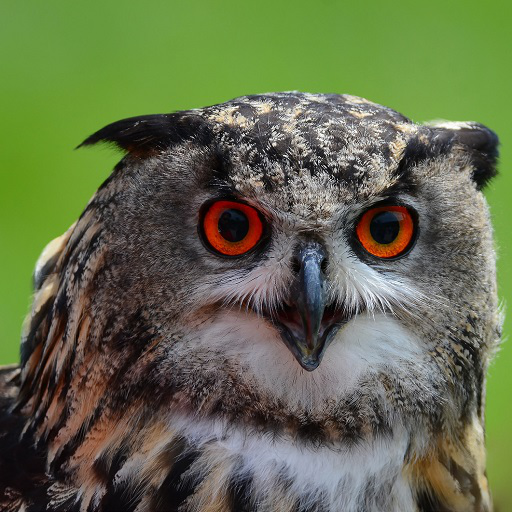

In [ ]:
ith_content = 1 #@param [1, 7, 14, 26, 28, 30, 33, 36, 38, 39]
content_path = f"./examples/content/{ith_content}.jpg"
from PIL import Image
print("content:", ith_content)
Image.open(content_path)

style: 1


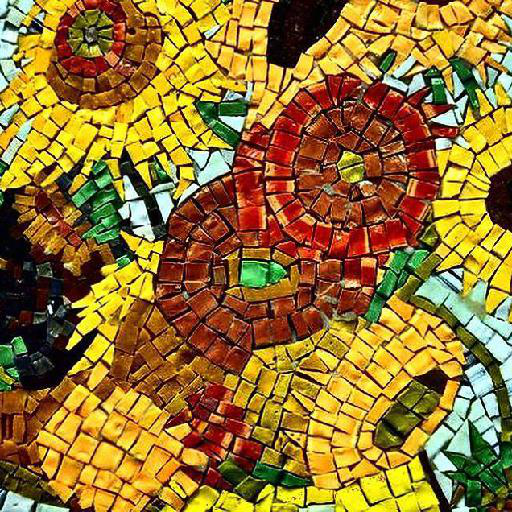

In [ ]:
ith_style = 1 #@param [1, 2, 3, 4, 5]
pb_path = f"./examples/model/pre-trained/style_{ith_style}.pb"
style_path = f"./examples/model/pre-trained/style_{ith_style}.jpg"
from PIL import Image
print("style:", ith_style)
Image.open(style_path)

In [ ]:
!python inference_style_transfer.py \
    --model  $pb_path \
    --serial ./examples/serial/default/ \
    --content $content_path \
    --interp $interp



2022-08-19 21:51:07.215250: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-08-19 21:51:07.233120: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-19 21:51:07.233718: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:04.0
2022-08-19 21:51:07.234000: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2022-08-19 21:51:07.235137: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2022-08-19 21:51:07.236129: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library li

In [ ]:
import cv2

In [ ]:
fps = interp/3
img = cv2.imread(f"./examples/serial/default/style_interp_0_{interp}.jpg")
h, w = img.shape[:2]
print("Total Frames", interp)
print("fps", fps)
print("height", h)
print("width", w)

Total Frames 100
fps 33.333333333333336
height 1024
width 1024


In [ ]:
#@title 影片生成
output_path = f"out.mp4"
out_video_writer = cv2.VideoWriter(
    output_path,
    cv2.VideoWriter_fourcc(*"mp4v"),
    fps,
    (w, h)
)
for idx in range(interp):
  path = f"./examples/serial/default/style_interp_{idx}_{interp}.jpg"
  img = cv2.imread(path)
  out_video_writer.write(img)
out_video_writer.release() 

In [ ]:
from IPython.display import HTML
HTML(f"""
<h1>這是預先跑好的結果</h1>
<table>
  <tr>
    <th>content:1, style:1</th>
  </tr>
  <tr>
    <td>
      <video src="https://i.imgur.com/oxpe5I7.mp4" controls autoplay loop/>
    </td>
  </tr>
</table>
""")

"content:1, style:1"
""


# 課後挑戰
風格轉換這主題的活躍初期有很多程式碼是用`.lua`或`tf1`寫的<br>
要改起來、轉檔會有些痛苦。<br>
參考的程式碼是實作在tf1的<br>
而且他們只有包含全局的筆觸變化，沒有遮罩版的筆觸變化。<br>
可以去閱讀他們的原始程式碼，<font size=6rem>想辦法把遮罩板實現出來</font><br>
> 做這份記事本的人有找到關鍵點，不過沒時間實作<br>
  <details><summary>提示</summary>
    <details><summary>可以去看原論文</summary>
      <details><summary>關鍵在</summary>
        <details><summary>這幾個位置</summary>
          <pre>mul_13, mul_14, mul_15</pre>
          <img src=https://i.imgur.com/Ooh5eRRr.png/>
          <details><summary>改法</summary>
          閱讀原始碼，想辦法把它從單一輸入改變成遮罩版輸入
          <img src="https://memeprod.sgp1.digitaloceanspaces.com/user-wtf/1658805137421.jpg"/>
          </details>
        </details>
      </details>
    </details>
  </details>


In [ ]:
!pip install netron=6.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 6.2 MB/s 


## 這邊要實際執行才會跑出畫面
<img src=https://i.imgur.com/Ooh5eRRr.png/>

In [ ]:
import netron
from google.colab import output
port = 48763
netron.start("./examples/model/pre-trained/style_1.pb", address=port, browse=False)
output.serve_kernel_port_as_iframe(port, height='800')

Serving './examples/model/pre-trained/style_1.pb' at http://localhost:48763


<IPython.core.display.Javascript object>